'''

# Exercises using Colab, Machine Learning, and ...

This is a [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) interface where several elements can be mixed e.g., 

* python code
* data
* comments
* ...

You can copy and past the code during the lesson from the link:
[tinyurl.com/mcsharednotes](tinyurl.com/mcsharednotes)

## Creating an empty Colab
Please follows the next steps

* Open in a browser the URL [https://drive.google.com/](https://drive.google.com/) 

* Please choose

+ New / More / Colaboratory

* Save the notebook in your preferred gdrive location  

## Markdown
Contents in **texts cells** can be written using [markdonw syntax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). 

Here it is a quick reference to the markdown syntax: 

[https://en.support.wordpress.com/markdown-quick-reference/](https://en.support.wordpress.com/markdown-quick-reference/) 

### COLAB Keyboard Shortcuts
To access the COLAB keyboard shortcuts:

[Menu] Tools / Keyboard Shortcuts (ctrl to be replaced by Command in the Mac)

* Ctrl+M  M     To change a cell into text
* Ctrl+M  Y      To change a cell into code
* Ctrl+M L       Toggle line numbers

'''

'''
# MNIST and Neural Networks


Credits. This notebook was (greatly) inspired by the work of <!-- [Daniel Moser](https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-mnist-cnn.ipynb), --> [Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras), [
Parul Pandey
](https://medium.com/analytics-vidhya/the-fashionable-hello-world-of-deep-learning-8b9e3d60a37c)

[MNIST](http://yann.lecun.com/exdb/mnist/) is a database of thousands of handwritten digits.
Training a model on the MNIST handwritten digits data is a classic in the Machine Learning community. It is considered as the entry point for Deep learning exercises.
MNIST is a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. The aim is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). 

*Solving* the MNIST is analogous to the “Hello World” of deep learning. 

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

'''

'''
## Backend 
We will use the Keras Python API with TensorFlow as the backend.
Please, in the COLAB menu, select: Runtime / Change Runtime Type / ...
Select

* If you can choose between Python2 and Python 3, please select **Python3** as Runtime type: 

* **TPU** as Hardware Accelerator

What can I do to run this notebook locally and not on Colab?

You need [GPU Hardware](https://devblogs.nvidia.com/accelerate-machine-learning-cudnn-deep-neural-network-library/), and install the required drivers.


'''

In [ ]:
##########################
# Loading the required libraries

import numpy as np                   # Advanced math library
import matplotlib.pyplot as plt      # To plot data
import random                        # Library for random numbers

# Keras library an d its highly abstract API will be used as front-end for programming Neural Networks
# Tensor flow will be used by Keras as back-end

import tensorflow as tf              # Library for low level neural network management

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Neural Network Model type 

from keras.layers.core import Dense, Dropout, Activation # Types of Neural Network Layers
from keras.utils import np_utils                         # Keras tools for dealing with NumPy

from IPython.display import IFrame   # to produce nice outputs and to embed web sites in notebooks

# If it will appear Using ****** backend if Keras Library is loaded successfully

'''

## Training Dataset

Dataset Inspection

'''

In [ ]:
#######################
# Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# A MNIST image has 28 x 28 pixel.
# The training and test number of images are:

print("Train dataset info. (60'000 images of 28x28 pixels)")
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print()
print("Test dataset info. (10'000 images of 28x28 pixels)")
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Train dataset info. (60'000 images of 28x28 pixels)
X_train shape (60000, 28, 28)
y_train shape (60000,)

Test dataset info. (10'000 images of 28x28 pixels)
X_test shape (10000, 28, 28)
y_test shape (10000,)


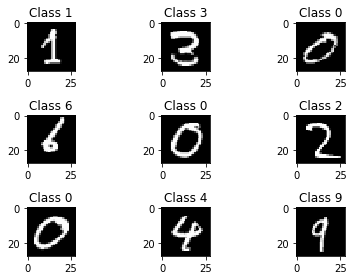

In [ ]:
##############################
# Drawing the pictures using Matplotlib

# Uncomment the command below to make the figures a bit bigger
#plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    # The image to be displaied are randomly selected
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
##############################
# Let's examine a single digit a little closer, and print out the array representing the last digit.

# Function to pretty print a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[1]) # Plotting the X_train image of index 1

0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0   51  159  253  159   50    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0   48  238  252  252  252  237    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0   54  227  253  252  239  233  252   57    6    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0   10   60  224  252  253  252  202   84  252  253  122    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0  163  252  252 

'''

# Flattening the input data layer

We are going to build a *fully connected artificial neural network* to classify the digits. The network needs a flatten dataset input. Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector (i.e., 28x28=784).

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

<!-- Credits: [Daniel Moser](https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-mnist-cnn.ipynb). Unfortunately it doesn't work anymore -->

'''


In [ ]:
############
# Flattening the input data layer
# 784 = 28x28
X_train = X_train.reshape(60000, 784) # reshape (60'000, 28, 28) tensor into (60'000, 784) matrix
X_test = X_test.reshape(10000, 784)   # reshape (10'000, 28, 28) tensor into (10'000, 784) matrix


# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We modify the Y using one-hot-encoding 
(Statisticians call this "dummy variables").
This will be useful, because the final output of the neural network will 
be very close to the one-hot-encoding format (more details later).

Examples of one-hot encoding

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
etc.
```

An example of the final (prediction) output of the network might be

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0, 0]
```
Each value will be between 0 and 1, the **highest value** will be the prediction.

E.g., in the data above the image is predicted being the digit `1`.

In [ ]:
############
# Turning data into one-hot_encoding
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

<!-- Credits: [Daniel Moser](https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-mnist-cnn.ipynb) Unfortunately it doesn't work anymore -->

In [ ]:
############
# Here it is the underlying framework of the Neural Network we are going to build

# The Sequential model is a linear stack of layers 
model = Sequential()

# 1st hidden Layer 

# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply 
# some weight and bias to it.
# input_shape=(784,) is the length of a vector representing an image which is fed
# to the network for classification.
# Please remember that 28x28=784
model.add(Dense(512, input_shape=(784,), 
                kernel_initializer = tf.random.uniform) # Weight values are initialized randomly
) 


In [ ]:
############
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

$$f(x) = max (0,x)$$

In [ ]:
############
# Now adding the Dropout Layer.
# A Dropout Layer randomly zeroes a selection of outputs (i.e., disables their activation)
# A Dropout layer helps protect the model from memorizing or "overfitting" the training data.
# Dropouts works only during training i.e., the net should develop a model
# using few information, while during prediction all the available information are used.
model.add(Dropout(rate=0.2)) # 4 out of 5 neuron outputs are zeroed

In [ ]:
## Adding the second hidden layer
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

In [ ]:
# The Final Output Layer
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN (Fully Connected Network) should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [ ]:
# Let's print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

# Compiling the model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *softmax* or *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More details here](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

In [ ]:
# Now the model we described above is compiled into code 
# that can be efficiently run on a computation resource 
# (in this case the google cloud infrastructure). GPU are used
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', # loss (penalty) function
              optimizer='adam',  # optimizer
              metrics=['accuracy'] # target measure
             )
# Adam optimization is a stochastic gradient descent method that is based 
# on adaptive estimation of first-order and second-order moments.
# More info on https://keras.io/api/optimizers/adam/
# and http://arxiv.org/abs/1412.6980

'''

# Training the model

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

'''

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, 
          epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 15s 29ms/step - loss: 5.4321 - accuracy: 0.1122
Epoch 2/5
469/469 [==============================] - 12s 25ms/step - loss: 2.3044 - accuracy: 0.1126
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 2.3018 - accuracy: 0.1124
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 2.3016 - accuracy: 0.1124


'''
Each Epoch upgrading the weights 469 times i.e.,
60'000 (rows in the training set) / 128 (batch size) = 468.75 --> 469 

*Loss* and *Accuracy*, in order, represent:

-  the value of the loss function of the network on the training set, 

- and the overall accuracy of the network on the training data. Please, remember that *Accuracy* metric was chosen when model.compile() was invoked.

'''

'''

## Evaluate Model's Accuracy on Test Data

'''

In [ ]:
score = model.evaluate(X_test, Y_test)
print('score')
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # Please, remember that *Accuracy* metric was chosen when model.compile() was invoked.

313/313 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1135
score
[2.301013708114624, 0.11349999904632568]
Test score: 2.301013708114624
Test accuracy: 0.11349999904632568


''' 

### Inspecting the output

'''

In [ ]:
################################################
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
# Old version code # predicted_classes = model.predict_classes(X_test)
# 
# np.armax looks for the index of the max value in each row ot the 
# [number.of.X_test.rows x 10] matrix (returned by model.predict)
# axis=-1 means that max search is performed row-wise
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Check which items we got right / wrong
# np.nonzero return the indices of the elements that are non-zero.
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

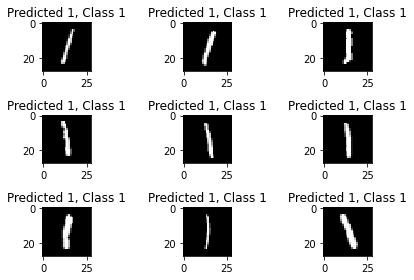

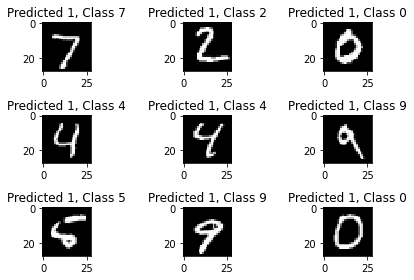

In [ ]:
################################################
# Showing figures for both correctly and not correctly classified ones  
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

'''

# Experimenting with the Batch Sizes!


'''

In [ ]:
################################################
# How does increasing the batch size to 10'000 
# affect the training time and test accuracy?
model.fit(X_train, Y_train,
          batch_size=10000, epochs=5,
          verbose=1)
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
6/6 [==============================] - 4s 674ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 2/5
6/6 [==============================] - 4s 682ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/5
6/6 [==============================] - 4s 665ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
6/6 [==============================] - 4s 662ms/step - loss: 2.3011 - accuracy: 0.1123
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1135
Test score: 2.301018714904785
Test accuracy: 0.11349999904632568


In [ ]:
################################################
# How about a batch size of 32?
''' # It's commented because it takes 3 minutes
model.fit(X_train, Y_train,
          batch_size=32, epochs=5,
          verbose=1)
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
'''

" # It's commented because it takes 3 minutes\nmodel.fit(X_train, Y_train,\n          batch_size=32, epochs=5,\n          verbose=1)\nscore = model.evaluate(X_test, Y_test)\nprint('Test score:', score[0])\nprint('Test accuracy:', score[1])\n"

'''

# Building a (not-so) Deep Convolutional Neural Network

'''

'''
Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

![Convolution Animation](https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=true)

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation is executed between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

![kernels](https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/kernels.png?raw=true)

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

![Max Pooling](https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=true)


'''

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

![Multiple Convolutions](https://drive.google.com/uc?export=download&id=1AHADfc7E_Ud0t3pUYgYzATcaTMycaIBz)

## Building a (not-so)-Deep Artificial Neural Network

In [ ]:
##########################
# Loading the required libraries

import numpy as np                   # Advanced math library
import matplotlib.pyplot as plt      # To plot data
import random                        # Library for random numbers

# Keras library an d its highly abstract API will be used as front-end for programming Neural Networks
# Tensor flow will be used by Keras as back-end

import tensorflow as tf              # Library for low level neural network management

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Neural Network Model type 

from keras.layers.core import Dense, Dropout, Activation # Types of Neural Network Layers
from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.utils import np_utils     # Keras tools for dealing with NumPy

from IPython.display import IFrame   # to produce nice outputs and to embed web sites in notebooks
from keras.models import load_model  # To load model (weights) previously saved

from keras.utils.data_utils import get_file
import os

##############
# Installing and importing the 
# Keract visualization library
!pip install keract
from keract import get_activations, display_activations

In [ ]:
################################################
print('Loading and formatting again the MNIST data')

def getMNIST(
    num_classes = 10 # number of unique digits
):
  '''Again, do some formatting. Except we do not flatten each image into 
     a 784-length vector because we want to perform 
     convolutions first
     '''

  # Loading (again) MNIST dataset
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  #  Again, do some formatting
  # Except we do not flatten each image. 
  # Rather we produce a tensor having the shape
  # required by convolutional layers:
  # [num_of_images, image_width, image_length, channel_size].
  # The channel_size=1 since we have black and white images.
  # If we had color images, then channel_size=3, one channel for each
  # of the RGB colors i.e., Red, Green, Blue, the basic colors upon which 
  # all the others can be built

  #The last one is a single dimension to represent the single-channel (pixel gray-scale value)
  X_train = X_train.reshape(60000, 28, 28, 1) 
  X_test = X_test.reshape(10000, 28, 28, 1)

  # change integers to 32-bit floating point numbers
  X_train = X_train.astype('float32')         
  X_test = X_test.astype('float32')

  # normalize each value for each pixel for the entire vector for each input
  X_train /= 255                              
  X_test /= 255
  # one-hot encoding of y

  # one-hot encoding of y
  Y_train = np_utils.to_categorical(y_train, num_classes)
  Y_test = np_utils.to_categorical(y_test, num_classes)

  return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = getMNIST()
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Loading and formatting again the MNIST data
Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
###########################################
# Function to download an already trained model')

#from keras.utils.data_utils import get_file
#import os
def downloadTrainedModel(modelName, gdriveID):
  '''The file will be retrieved from google drive and saved in the local directory.
     - modelName: the file name to be used to store locally the trained model content
     - gdriveID: the Google Drive Public Document ID '''
  url='https://docs.google.com/uc?export=download&id={id}'.format(id=gdriveID)
  currentDir = os.getcwd() # get current working directory
  destinationPath = os.path.join( currentDir, modelName  )
  effectivePath = get_file(
            destinationPath, # file name 
            url # url
            )
  print('Model saved in '+effectivePath)
  return effectivePath

# This will be used later

In [ ]:
##############
# Create the Artificial Neural Network

no_classes=10

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), 
                 activation='relu', 
                 input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 10)          1510      
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               164096    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                      

In [ ]:
##############
# Compiling the model.
# Using again the adam optimizer
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )

In [ ]:
##############
# Fit the model i.e., training the Artificial Neural Network

batch_size = 250
no_epochs = 25
#no_classes = 10
verbosity = 1
validation_split = 0.2

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)


Epoch 1/25
192/192 [==============================] - 32s 161ms/step - loss: 0.4104 - accuracy: 0.8859 - val_loss: 0.1574 - val_accuracy: 0.9537
Epoch 2/25
192/192 [==============================] - 18s 94ms/step - loss: 0.1286 - accuracy: 0.9610 - val_loss: 0.0965 - val_accuracy: 0.9733
Epoch 3/25
192/192 [==============================] - 18s 93ms/step - loss: 0.0836 - accuracy: 0.9749 - val_loss: 0.0719 - val_accuracy: 0.9795
Epoch 4/25
192/192 [==============================] - 18s 93ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0668 - val_accuracy: 0.9791
Epoch 5/25
192/192 [==============================] - 18s 94ms/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 6/25
192/192 [==============================] - 18s 94ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0538 - val_accuracy: 0.9838
Epoch 7/25
192/192 [==============================] - 20s 104ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0505 - val_accurac

**Un esempio di output**

Epoch 1/25
192/192 [==============================] - 19s 99ms/step - loss: 0.4377 - accuracy: 0.8792 - val_loss: 0.1413 - val_accuracy: 0.9623

Epoch 2/25
192/192 [==============================] - 18s 96ms/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.0946 - val_accuracy: 0.9738

Epoch 3/25
192/192 [==============================] - 18s 95ms/step - loss: 0.0766 - accuracy: 0.9768 - val_loss: 0.0740 - val_accuracy: 0.9787

Epoch 4/25
192/192 [==============================] - 18s 96ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0660 - val_accuracy: 0.9812

...

Epoch 23/25
192/192 [==============================] - 19s 100ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0585 - val_accuracy: 0.9877

Epoch 24/25
192/192 [==============================] - 19s 100ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0533 - val_accuracy: 0.9887

Epoch 25/25
192/192 [==============================] - 19s 99ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0579 - val_accuracy: 0.9890

Prima di testare i risultati, salviamo il modello e lo recuperiamo memorizandolo in una nuova variabile

In [ ]:
###########################################
print('Saving the just trained model to file')
#import os
modelFileName='my_model_mini_conv_net.h5'
if not os.path.exists(modelFileName):
  model.save(modelFileName)
  print('Model saved in '+modelFileName)
else:
  print('File already existing '+modelFileName)
  # The latter to prevent overwriting an existing file

Saving the just trained model to file
Model saved in my_model_mini_conv_net.h5


In [ ]:
###########################################
# Copy the saved model to a safer place

# When the Virtual Machine is collected 
# (e.g., after some time of inactivity), 
# the File System is emptied. Therefore, 
# you would like to copy the model
# to a more permanent file system.

# If you would like to copy your saved model 
# to your gdrive, please uncomment the code below 
# and follow the instructions.
'''
#### Mounting google drive on the File System of the Machine running colab
## If required, please login to google drive and copy & paste the authentication token
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp my_model_mini_conv_net.h5 '/content/drive/My Drive/Colab Notebooks/'
''';

In [ ]:
###########################################
print('Downloading already trained model')
alreadyTrainedModelPath = downloadTrainedModel(
    'model_mini_conv_net_v2.h5', # Model file name
    '1soujvuSRSl-m46soUfyN149k6_Fracv_' # Google Drive Public Document ID
    )

# https://drive.google.com/file/d/1soujvuSRSl-m46soUfyN149k6_Fracv_/view?usp=sharing

2072576/2060840 [==============================] - 0s 0us/step
Model saved in /content/model_mini_conv_net_v2.h5


In [ ]:
###########################################
# Loading a previously saved model from the Colab File System

# model_mini_conv_net_v2.h5 
print('Loading '+alreadyTrainedModelPath)

# Better to specify the file full path
model2 = load_model(alreadyTrainedModelPath)
model2.summary()

Loading /content/model_mini_conv_net_v2.h5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          1510      
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               164096    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
           

In [ ]:
###########################################
# Evaluation
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # As it was specified at compile time

Test score: 0.05212326720356941
Test accuracy: 0.9872999787330627


In [ ]:
###########################################
# Focusing on one image to inspect the neural network

# select 1 image but preserving the 4d tensor shape
singleImgX = X_test[:1] 
#print(X_test[:1].shape) # (1, 28, 28, 1)
singleImgY = Y_test[:1]
#print(Y_test[:1].shape) # (1, 10)

activations = get_activations(model2, singleImgX)

In [ ]:
###########################################
# Printing extracted layer information
def getLayersInfo(activations):
  # '{name:16} ' Space padding to 16 chars
  st = '{name:16} {shape}\n'.format(name='LAYER NAME', shape='TENSOR SHAPE')
  #print('Layer_Name   tensor.shape')
  for layerName, tensor in activations.items():
    #print(layerName, tensor.shape)
    #st+=layerName+'\t'+str(tensor.shape)+'\n'
    st += '{name:16} {shape}\n'.format(name=layerName, shape=str(tensor.shape))
  st+='\n'
  return st

# The kerakt library (the visualization framework) names the input layer adding '_input...' to the subsequent layer
# If there are multple same-type-layers, keract adds a number to disambiguate
layersInfo=getLayersInfo(activations)
print(layersInfo) 

LAYER NAME       TENSOR SHAPE
conv2d_2_input   (1, 28, 28, 1)
conv2d_2         (1, 24, 24, 6)
max_pooling2d_1  (1, 12, 12, 6)
conv2d_3         (1, 8, 8, 10)
flatten_1        (1, 640)
dense_1          (1, 256)
dense_2          (1, 10)




In [ ]:
###########################################
# Some useful function for later use

# Function to show a sngle layer output
def showLayer(activationDict, layerName, fig_size=(5,5)):
  # building a dictionary with only one layer info
  dic={layerName:activationDict[layerName]} 
  display_activations(dic, cmap="gray", save=False, fig_size=fig_size) # fig_size used because default figure size is too large

# The input layer name keeps chainging, 
# therefore a function to identify its name is helpful.
def getInputLayerName(activations):
  for layerName, tensor in activations.items():
    if 'input' in layerName:
      return layerName
  return None


Showing input (layer)
conv2d_2_input (1, 28, 28, 1) 


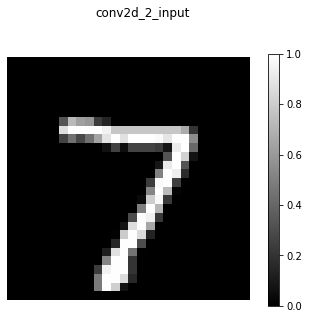

In [ ]:
###########################################
# Showing the input

print('Showing input (layer)')
# Getting input layer name
layerName = getInputLayerName(activations) 

# Showing the input layer as perceived 
# by processing the selected image
showLayer(activations, layerName, fig_size=(5,5))

Showing the 6 convolutional filters

LAYER NAME       TENSOR SHAPE
conv2d_2_input   (1, 28, 28, 1)
conv2d_2         (1, 24, 24, 6)
max_pooling2d_1  (1, 12, 12, 6)
conv2d_3         (1, 8, 8, 10)
flatten_1        (1, 640)
dense_1          (1, 256)
dense_2          (1, 10)


conv2d_2 (1, 24, 24, 6) 


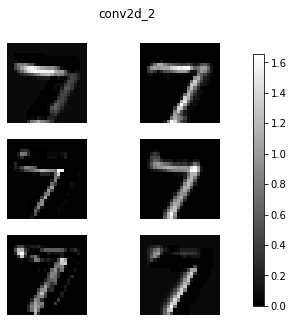

In [ ]:
###########################################
# Showing the 1st convolutional layer filters

print('Showing the 6 convolutional filters')
print()
print(layersInfo) 
#conv2d_2 (1, 24, 24, 6) i.e., 6 filters 5x5, from a 28x28 pixels image, 24x24 different output can be obtained (24=28-5+1)
layerName = 'conv2d_2'
showLayer(activations, layerName, fig_size=(5,5))

As you can see, the feature detected are:

- horizontal lines e.g., the top of the seven, 
- the inner edges e.g., the slash (i.e., the oblique lines)
  -- the conjunction points between two lines
- ...

 The 6 filters detect different features of the input image.

Focusing on max pooling

LAYER NAME       TENSOR SHAPE
conv2d_2_input   (1, 28, 28, 1)
conv2d_2         (1, 24, 24, 6)
max_pooling2d_1  (1, 12, 12, 6)
conv2d_3         (1, 8, 8, 10)
flatten_1        (1, 640)
dense_1          (1, 256)
dense_2          (1, 10)


max_pooling2d_1 (1, 12, 12, 6) 


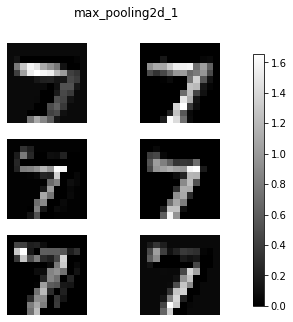

In [ ]:
##########################################
# Max pooling
print('Focusing on max pooling')
print()
print(layersInfo) 
layerName = 'max_pooling2d_1'
showLayer(activations, layerName, fig_size=(5,5))


Recall that the Max Pooling layer is used for downsampling, i.e., making the image smaller with (preferably) limited information loss. You can see this happening when you compare the visualization of the Max Pooling layer with the Conv2D one above: the activations learnt by the convolutional layer persist, but they get blocky and the total images get smaller (from 24x24 to 12x12). 

Focusing on the second Convolutional Layer

LAYER NAME       TENSOR SHAPE
conv2d_2_input   (1, 28, 28, 1)
conv2d_2         (1, 24, 24, 6)
max_pooling2d_1  (1, 12, 12, 6)
conv2d_3         (1, 8, 8, 10)
flatten_1        (1, 640)
dense_1          (1, 256)
dense_2          (1, 10)


conv2d_3 (1, 8, 8, 10) 


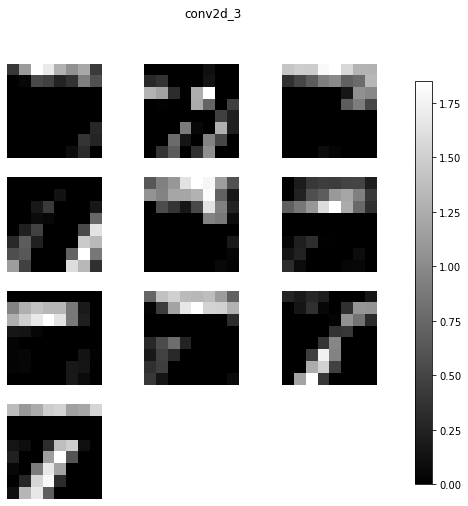

In [ ]:
##########################################
# 2nd Convolutiona Layer
print('Focusing on the second Convolutional Layer')
print()
print(layersInfo) 
#conv2d_3 (1, 8, 8, 10)
layerName = 'conv2d_3'
showLayer(activations, layerName, fig_size=(8,8))

Here, ten high level features patterns are detect in the image. Even if they are more complex, you can still detect how they activate for the number seven.

Focusing on the output before softmax

LAYER NAME       TENSOR SHAPE
conv2d_2_input   (1, 28, 28, 1)
conv2d_2         (1, 24, 24, 6)
max_pooling2d_1  (1, 12, 12, 6)
conv2d_3         (1, 8, 8, 10)
flatten_1        (1, 640)
dense_1          (1, 256)
dense_2          (1, 10)


dense_2 (1, 10) 


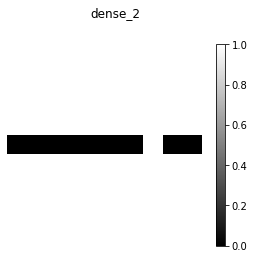

Target variable
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
##########################################
# 
print('Focusing on the output before softmax')
print()
print(layersInfo) 
layerName = 'dense_2'
showLayer(activations, layerName, fig_size=(4,4))

print('Target variable')
print(singleImgY)

It is the output of a flat layer therefore it is an array, visually represented as dots on a line segment. It is also the output of a softmax function (i.e., all 10 outputs values sums up to 1). 
The most high value will be selected as the prediction. Please, remember that in the target variable, output refers to respectively digit 0, 1, ..., 9. In this output, **the predicted output is successful**, since it matches the 7 position.

## Using a Toy Image

In [ ]:
########################
# Creating a toy image to test the convolutional layers
#print(img)
st="""
0000000000001110011100000000
0000000000001110001110000000
0000000000001110000111000000
1111111110001110000011100000
1111111110001110000001110000
1111111110001110000000111000
0000000000001110000000011100
0000000000001110000000001110
0000000000001110000000000011
0000000111000000000000000000
0000001110011100001110000011
0000011100011100000111000111
0000111000011100000011101110
0001110011111111100001111100
0011100011111111100000111000
0111000011111111100001111100
1110000000011100000011101110
1100000000011100000111000111
0000000000011100001110000011
0001110000000000000000000000
0011111000011111111111000111
0110001100011111111111000111
1100000110000000000000001110
1100000110000000000000011110
1100000110000000000001111000
0110001100000000000111100000
0011111000000000111100000000
0001110000000001110000000000"""
st=st.strip('\n') # removing first carriage return
stli=st.split('\n')
#print(stli)
nda = np.zeros((28,28), dtype=int)
for ii in range(28):
  for jj in range(28):
    if stli[ii][jj]=='1': # list of lists
      nda[ii, jj]=1 # numpy ndarray (i.e., ndimensional array)

#print(nda.shape) # (28, 28)
#plt.imshow(nda, cmap='gray', interpolation='none')

# Reshaping to a 4d tensor, as required by the network
toyImage = nda.reshape( (1, 28, 28, 1) )
print(toyImage.shape) # (1, 28, 28, 1)

(1, 28, 28, 1)


In [ ]:
toyActivations = get_activations(model2, toyImage)

Showing input (layer)
conv2d_2_input (1, 28, 28, 1) 


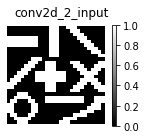

In [ ]:
###########################################
print('Showing input (layer)')
# Getting input layer name
layerName = getInputLayerName(toyActivations) 

# Showing the input layer as perceived 
# by processing the selected image
showLayer(toyActivations, layerName, fig_size=(2,2))


conv2d_2 (1, 24, 24, 6) 


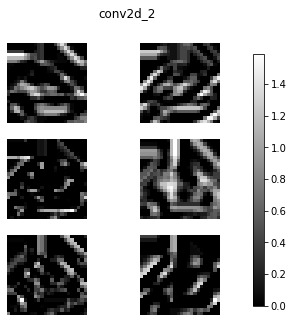

In [ ]:
###########################################
#print('Showing the 6 convolutional filters')
showLayer(toyActivations, 'conv2d_2', fig_size=(5,5))

# Working on a (little-bit) deeper Neural Network

In [ ]:
################################################
# import some additional libraries

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization
from keras.utils import np_utils 
from keras.datasets import mnist  


In [ ]:
################################################
print('Loading and formatting MNIST data')

def getMNIST(
    num_classes = 10 # number of unique digits
):
  '''Again, do some formatting. Except we do not flatten each image into 
     a 784-length vector because we want to perform 
     convolutions first
     '''
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
  X_test = X_test.reshape(10000, 28, 28, 1)

  X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
  X_test = X_test.astype('float32')

  X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
  X_test /= 255
  # one-hot encoding of y

  # one-hot encoding of y
  Y_train = np_utils.to_categorical(y_train, num_classes)
  Y_test = np_utils.to_categorical(y_test, num_classes)

  return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = getMNIST()
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Loading and formatting MNIST data
Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
################################################
# Designing the convolutional neural network

model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3),                         # 32 different 3x3 kernels --> so 32 feature maps
                 input_shape=(28,28,1)))             # Shape of the data given in input: 28x28 pixel, 1 channel (gray color only)
                                                     # The very first layer needs information about the input
                                                     
model.add(BatchNormalization(axis=-1))               # Normalize each output feature before activation.
                                                     # Optimal mean and sigma values are searched during training
                                                     # considering only the batch data. 
                                                     # Batch normalisation allows much higher learning rates, 
                                                     # i.e., increasing the speed at which networks train. 

convLayer01 = Activation('relu')                     # activation layer (linear rectifier)
model.add(convLayer01)                               # A reference to the last step of this layer is saved in a variable
                                                     # so that it can be later retrieved e.g., for inspection  

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
################################################
# Let's print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [ ]:
################################################
print('Using again the adam optimizer')

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )

Using again the adam optimizer


In [ ]:
###########################################
# Data augmentation.
# Data augmentation prevents overfitting by addin randomly and slightly changed 
# images to the training set.
# Keras has a great built-in feature to do automatic augmentation of images
# Extra images are created by slighty rotating, shifting, zooming, ... images

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator() # No transformation is required for the test set

In [ ]:
###########################################
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
####### WARNING 25 MINUTES training ####################################
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# Bath processing ensures SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

# old code, now deprecated
#model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
#                    validation_data=test_generator, validation_steps=10000//128)
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

# The model takes about 15 to 25 minutes to train (about 3 to 5 minutes per epoch)

Epoch 1/5
468/468 [==============================] - 188s 400ms/step - loss: 0.1295 - accuracy: 0.9595 - val_loss: 0.0622 - val_accuracy: 0.9818
Epoch 2/5
468/468 [==============================] - 183s 390ms/step - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 3/5
468/468 [==============================] - 182s 388ms/step - loss: 0.0394 - accuracy: 0.9882 - val_loss: 0.0496 - val_accuracy: 0.9853
Epoch 4/5
468/468 [==============================] - 183s 391ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0183 - val_accuracy: 0.9940
Epoch 5/5
468/468 [==============================] - 182s 389ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0332 - val_accuracy: 0.9874


Esempio di output del training

Epoch 1/5
468/468 [==============================] - 169s 360ms/step - loss: 0.1336 - accuracy: 0.9593 - val_loss: 0.0824 - val_accuracy: 0.9811

Epoch 2/5
468/468 [==============================] - 173s 370ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0639 - val_accuracy: 0.9777

Epoch 3/5
468/468 [==============================] - 165s 352ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0293 - val_accuracy: 0.9899

Epoch 4/5
468/468 [==============================] - 169s 362ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0749 - val_accuracy: 0.9761

Epoch 5/5
468/468 [==============================] - 174s 371ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0215 - val_accuracy: 0.9929
<tensorflow.python.keras.callbacks.History at 0x7f8926abcc50>

In [ ]:
###########################################
print('Saving the just trained model to file')
#import os
modelFileName='my_model_deep_conv_net.h5'
if not os.path.exists(modelFileName):
  model.save(modelFileName)
  print('Model saved in '+modelFileName)
else:
  print('File already existing '+modelFileName)
  # The latter to prevent overwriting an existing file


Saving the just trained model to file
Model saved in my_model_deep_conv_net.h5


In [ ]:
###########################################
# Copy the saved model to a safer place

# When the Virtual Machine is collected 
# (e.g., after some time of inactivity), 
# the File System is emptied. Therefore, 
# better move the just trained and 
# saved model to a more permanent file system.

# If you would like to copy your saved model 
# to your gdrive, please uncomment the code below 
# and follow the instructions.
'''
#### Mounting google drive on the File System of the Machine running colab
## If required, please login to google drive and copy & paste the authentication token
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp my_model_deep_conv_net.h5 '/content/drive/My Drive/Colab Notebooks/'
'''





"\n#### Mounting google drive on the File System of the Machine running colab\n## If required, please login to google drive and copy & paste the authentication token\nfrom google.colab import drive\ndrive.mount('/content/drive', force_remount=True)\n!cp my_model_deep_conv_net.h5 '/content/drive/My Drive/Colab Notebooks/'\n"

In [ ]:
###########################################
print('Downloading already trained model')
alreadyTrainedModelPath = downloadTrainedModel(
    'model_deep_conv_net.h5', 
    '1gefGSHM1YFexhQOBZ79yuJJx_6EljrbR' # Google Drive Public Document ID
    )

7282688/7269608 [==============================] - 0s 0us/step
Model saved in /content/model_deep_conv_net.h5


In [ ]:
###########################################
# Loading a previously saved model from the Colab File System

# model_mini_conv_net_v2.h5 
print('Loading '+alreadyTrainedModelPath)

# Better to specify the file full path
model2 = load_model(alreadyTrainedModelPath)
model2.summary()

Loading /content/model_deep_conv_net.h5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_12 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_13

In [ ]:
###########################################
print('Evaluating the Classifier performances')
score = model2.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Evaluating the Classifier performances
313/313 [==============================] - 8s 25ms/step - loss: 0.0222 - accuracy: 0.9928
Test score: 0.022240495309233665
Test accuracy: 0.9927999973297119
